<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data processing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Models-learning" data-toc-modified-id="Models-learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models learning</a></span><ul class="toc-item"><li><span><a href="#Ridge" data-toc-modified-id="Ridge-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Gradient-Boosting-(LightGBM)" data-toc-modified-id="Gradient-Boosting-(LightGBM)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gradient Boosting (LightGBM)</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Models-analysis" data-toc-modified-id="Models-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

# Car price prediction
A used car selling site is developing an app to attract new customers. In the app, one can quickly find out the market value of their car. Based on historical data (technical characteristics, equipment, price) of cars, you need to build a model to determine the cost.

Important parameters for the customer:

- quality of prediction;
- prediction speed;
- learning time.

Features:
- DateCrawled - date of downloading the advertisement from the database
- VehicleType - type of car body
- RegistrationYear — year of car registration
- Gearbox - type of gearbox
- Power - power (hp)
- Model - car model
- Kilometer - mileage (km)
- RegistrationMonth — month of car registration
- FuelType — type of fuel
- Brand - car brand
- NotRepaired - was the car under repair or not
- DateCreated — date of creation of the advertisement
- NumberOfPictures - the number of photos of the car
- PostalCode - postal code of the owner of the profile (user)
- LastSeen - date of last user's activity

Target feature
- Price - price (EUR)

**Plan**:

1. Data processing and analysis
2. Selection of hyperparameters for the models
3. Analysis of learning rate, prediction rate and quality of selected models

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data processing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Models-learning" data-toc-modified-id="Models-learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models learning</a></span><ul class="toc-item"><li><span><a href="#Ridge" data-toc-modified-id="Ridge-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Gradient-Boosting-(LightGBM)" data-toc-modified-id="Gradient-Boosting-(LightGBM)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gradient Boosting (LightGBM)</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Models-analysis" data-toc-modified-id="Models-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

## Data processing

In [1051]:
import pandas as pd
import numpy as np
import seaborn as sn
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint

from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
import lightgbm as lgb

In [1052]:
df = pd.read_csv('datasets/autos.csv') 
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [1053]:
#name of columns into the snake case 
df.columns = ['date_crawled',  'price', 'vehicle_type', 'registration_year',  'gear_box',  
              'power', 'model', 'kilometer', 'registration_month',  'fuel_type',  'brand',
              'not_repaired',  'date_created',  'number_of_pictures',  'postal_code',  'last_seen'] 

date_crawled and last_seen are not important features of an **advertisement**, we can delete those columns.

In [1054]:
df.drop(['date_crawled', 'last_seen'], inplace=True, axis=1)

In [1055]:
#check the duplicates
df.duplicated().sum()

10194

In [1056]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344175 entries, 0 to 344174
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               344175 non-null  int64 
 1   vehicle_type        307223 non-null  object
 2   registration_year   344175 non-null  int64 
 3   gear_box            324726 non-null  object
 4   power               344175 non-null  int64 
 5   model               324754 non-null  object
 6   kilometer           344175 non-null  int64 
 7   registration_month  344175 non-null  int64 
 8   fuel_type           311729 non-null  object
 9   brand               344175 non-null  object
 10  not_repaired        274247 non-null  object
 11  date_created        344175 non-null  object
 12  number_of_pictures  344175 non-null  int64 
 13  postal_code         344175 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 36.8+ MB


In [1057]:
df.duplicated().sum()

0

date_created and postal_code are not important features of a **vehicle**, we can delete those columns.

In [1058]:
df.drop(['date_created', 'postal_code'], inplace=True, axis=1)

replacing NaN in **not_repaired** with no and making it *int*

In [1059]:
df.not_repaired.value_counts(dropna=False)

no     238920
NaN     69928
yes     35327
Name: not_repaired, dtype: int64

In [1066]:
df.not_repaired.fillna('no', inplace=True)
df.not_repaired.replace({'no':0, 'yes':1}, inplace=True)
df.not_repaired = df.not_repaired.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344175 entries, 0 to 344174
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               344175 non-null  int64 
 1   vehicle_type        307223 non-null  object
 2   registration_year   344175 non-null  int64 
 3   gear_box            324726 non-null  object
 4   power               344175 non-null  int64 
 5   model               324754 non-null  object
 6   kilometer           344175 non-null  int64 
 7   registration_month  344175 non-null  int64 
 8   fuel_type           311729 non-null  object
 9   brand               344175 non-null  object
 10  not_repaired        344175 non-null  int32 
 11  number_of_pictures  344175 non-null  int64 
dtypes: int32(1), int64(6), object(5)
memory usage: 30.2+ MB


In [1068]:
df.describe(include='all')

,price,vehicle_type,registration_year,gear_box,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,number_of_pictures
count,344175.000000,307223,344175.000000,324726,344175.000000,324754,344175.000000,344175.000000,311729,344175,344175.000000,344175.0
unique,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,NaN,NaN
top,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,NaN,NaN
freq,NaN,88618,NaN,260508,NaN,28321,NaN,NaN,210087,74667,NaN,NaN
mean,4395.893249,NaN,2004.223578,NaN,109.904886,NaN,128256.744389,5.704525,NaN,NaN,0.102643,0.0
std,4506.888598,NaN,90.906705,NaN,191.468515,NaN,37907.597348,3.729554,NaN,NaN,0.303492,0.0
min,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,0.000000,0.0
25%,1000.000000,NaN,1999.000000,NaN,68.000000,NaN,125000.000000,3.000000,NaN,NaN,0.000000,0.0
50%,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,0.000000,0.0
75%,6300.000000,NaN,2008.000000,NaN,141.000000,NaN,150000.000000,9.000000,NaN,NaN,0.000000,0.0


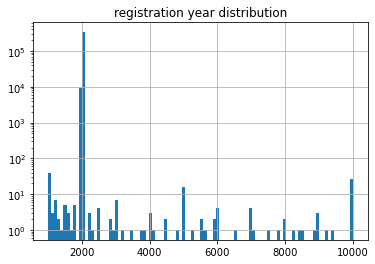

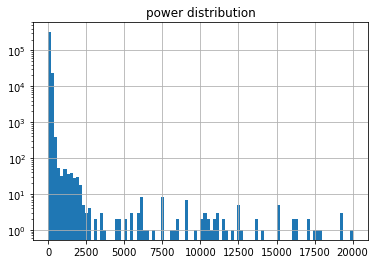

In [1069]:
df['registration_year'].hist(bins=100, log=True)
plt.title('registration year distribution')
plt.show()

df['power'].hist(bins=100, log=True)
plt.title('power distribution')
plt.show()

Outliers in *registration_year* should be removed. Let's limit it by 1910-2016 (2016 is the year of data crawling, see below)

Outliers in *power* should be removed. Let's limit it by 2000 ([link](https://en.wikipedia.org/wiki/List_of_production_cars_by_power_output))

In [1071]:
df2 = pd.read_csv('datasets/autos.csv') 
df2['DateCrawled'].sort_values()

329497    2016-03-05 14:06:22
220583    2016-03-05 14:06:23
176823    2016-03-05 14:06:24
99885     2016-03-05 14:06:24
324763    2016-03-05 14:06:24
                 ...         
204218    2016-04-07 14:36:53
53739     2016-04-07 14:36:54
301030    2016-04-07 14:36:55
339649    2016-04-07 14:36:56
90713     2016-04-07 14:36:58
Name: DateCrawled, Length: 354369, dtype: object

In [1072]:
df = df.query('1910<= registration_year <=2016 ')
df = df.query('power <=2000 ')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329722 entries, 0 to 344174
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               329722 non-null  int64 
 1   vehicle_type        307103 non-null  object
 2   registration_year   329722 non-null  int64 
 3   gear_box            312169 non-null  object
 4   power               329722 non-null  int64 
 5   model               312360 non-null  object
 6   kilometer           329722 non-null  int64 
 7   registration_month  329722 non-null  int64 
 8   fuel_type           302856 non-null  object
 9   brand               329722 non-null  object
 10  not_repaired        329722 non-null  int32 
 11  number_of_pictures  329722 non-null  int64 
dtypes: int32(1), int64(6), object(5)
memory usage: 31.4+ MB


Price checked, no outliers:

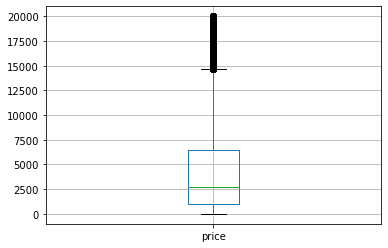

In [1073]:
df.boxplot(["price"])
plt.show()

Let's check registration_month coulumn:

Removing **number_of_pictures** column:

In [1078]:
df.drop(['number_of_pictures'], inplace=True, axis=1)

In [1079]:
#filling missing model, vehicle_type, fuel_type,gear_box according to the most frequent values

df.model = df.groupby(['brand', 'registration_year'])['model'].transform(lambda x: 
                                                                         x.fillna((x.mode()[0] if not x.mode().empty else "Unknown")))
df.vehicle_type = df.groupby(['brand', 'model'])['vehicle_type'].transform(lambda x: 
                                                                         x.fillna((x.mode()[0] if not x.mode().empty else "Unknown")))
df.fuel_type = df.groupby(['brand', 'model'])['fuel_type'].transform(lambda x: 
                                                                         x.fillna((x.mode()[0] if not x.mode().empty else "Unknown")))
df.gear_box = df.groupby(['brand', 'model'])['gear_box'].transform(lambda x: 
                                                                         x.fillna((x.mode()[0] if not x.mode().empty else "Unknown")))

In [1080]:
df = df.replace('Unknown', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329722 entries, 0 to 344174
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               329722 non-null  int64 
 1   vehicle_type        329719 non-null  object
 2   registration_year   329722 non-null  int64 
 3   gear_box            329718 non-null  object
 4   power               329722 non-null  int64 
 5   model               326540 non-null  object
 6   kilometer           329722 non-null  int64 
 7   registration_month  329722 non-null  int64 
 8   fuel_type           329720 non-null  object
 9   brand               329722 non-null  object
 10  not_repaired        329722 non-null  int32 
dtypes: int32(1), int64(5), object(5)
memory usage: 28.9+ MB


1% of data is nan, we can drop it

In [1081]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326540 entries, 0 to 344174
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               326540 non-null  int64 
 1   vehicle_type        326540 non-null  object
 2   registration_year   326540 non-null  int64 
 3   gear_box            326540 non-null  object
 4   power               326540 non-null  int64 
 5   model               326540 non-null  object
 6   kilometer           326540 non-null  int64 
 7   registration_month  326540 non-null  int64 
 8   fuel_type           326540 non-null  object
 9   brand               326540 non-null  object
 10  not_repaired        326540 non-null  int32 
dtypes: int32(1), int64(5), object(5)
memory usage: 28.6+ MB


Correlation matrix


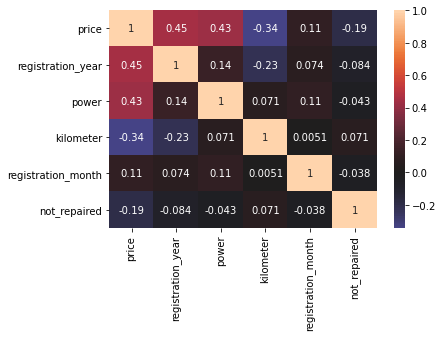

In [1082]:
print('Correlation matrix')
sn.heatmap(df.corr(), annot=True, center=0)
plt.show()

No co-dependent features

### Conclusion
We studied the dataset with data on car sales advertisements. Gaps and duplicates are processed, outliers are removed.
Columns **date_crawled, last_seen, date_created, postal_code** removed as uninformative.

## Models learning

In [1083]:
categorical = ['vehicle_type', 'gear_box', 'model', 'fuel_type', 'brand']

target = df['price']

features_encoded = pd.get_dummies(df.drop(['price'], axis=1))
features = df.drop(['price'], axis=1).copy()
features[categorical] = features[categorical].astype('category')  

In [1084]:
#splitting the datasets
X_enc_train, X_enc_valid, y_train, y_valid = train_test_split(features_encoded, target, test_size=.25, random_state=25)

X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=.25, random_state=25)

for i in [X_enc_train, y_train, X_enc_valid, y_valid]:
    print(i.shape)

(244905, 311)
(244905,)
(81635, 311)
(81635,)


### Ridge

In [1085]:
model = Ridge()

In [1086]:
%%time
distributions = dict(alpha=uniform(loc=0, scale=20))
reg = RandomizedSearchCV(model, distributions, random_state=25, scoring='neg_root_mean_squared_error', cv=2, n_iter=50, n_jobs=7)
search = reg.fit(X_enc_train, y_train)

print(search.best_params_)
print('RMSE:', -search.best_score_)

{'alpha': 1.5428063975838402}
RMSE: 2852.1698658511027
Wall time: 42.9 s


### Gradient Boosting (LightGBM)

Let's check how fast LightGBM works depending on whether feature encoding was initially performed. We use the default hyperparameter values.

In [1087]:
model = lgb.LGBMRegressor(random_state=25)
callbacks = [lgb.log_evaluation(period=0)]

In [1105]:
starttime = time.time()

model.fit(X_enc_train, y_train, eval_set=(X_enc_valid, y_valid), eval_metric='rmse', callbacks= callbacks)

print('Best rmse:\n', model.best_score_['valid_0'])
print(f"Time spent, s:", round(time.time() - starttime, 2))

Best rmse:
 OrderedDict([('rmse', 1783.254827161943)])
Time spent, s: 1.95


In [1106]:
starttime = time.time()

model.fit(X_train, y_train, categorical_feature='auto', eval_set=(X_valid, y_valid), eval_metric='rmse',  callbacks= callbacks)

print('Best rmse:\n', model.best_score_['valid_0'])
print(f"Time spent, s:", round(time.time() - starttime, 2))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Best rmse:
 OrderedDict([('rmse', 1726.2230714831235)])
Time spent, s: 0.62


LightGBM with uncoded categorical features works three times faster and gives better quality. We will use it to select parameters.

In [1111]:
%%time
callbacks = [lgb.log_evaluation(period=-1)]
model = lgb.LGBMRegressor(random_state=25, objective='rmse')

distributions = dict(n_estimators=randint(1, 1000), max_depth=randint(1, 15), learning_rate=uniform(loc=0.01, scale=0.1))
reg = RandomizedSearchCV(model, distributions, random_state=25, scoring='neg_root_mean_squared_error', cv=2, n_iter=2, n_jobs=7)
search = reg.fit(X_train, y_train, categorical_feature='auto', eval_set=(X_valid, y_valid), callbacks= callbacks)

print(search.best_params_)
print('RMSE:', -search.best_score_)
print('time for learning with these parameters, s:', 2*round(search.cv_results_['mean_fit_time'][search.best_index_], 2)) 

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


{'learning_rate': 0.03788389407010691, 'max_depth': 8, 'n_estimators': 941}
RMSE: 1710.077280368363
time for learning with these parameters, s: 15.14
Wall time: 24 s


### CatBoost

Let's check how fast CatBoost works depending on whether feature encoding was initially performed. We use the default hyperparameter values.

In [1115]:
model = CatBoostRegressor(random_state=25, verbose=200, eval_metric='RMSE')

In [1116]:
starttime = time.time()
model.fit(X_enc_train, y_train, eval_set=(X_enc_valid, y_valid)) # 

print(f"Time spent, s:", round(time.time() - starttime, 2))

Learning rate set to 0.120773
0:	learn: 4200.6128637	test: 4161.5540506	best: 4161.5540506 (0)	total: 54.5ms	remaining: 54.4s
200:	learn: 1796.6085052	test: 1800.7296431	best: 1800.7296431 (200)	total: 3.31s	remaining: 13.2s
400:	learn: 1720.7350090	test: 1745.6862936	best: 1745.6862936 (400)	total: 6.59s	remaining: 9.84s
600:	learn: 1678.7586765	test: 1720.8215930	best: 1720.8215930 (600)	total: 9.75s	remaining: 6.48s
800:	learn: 1649.3339676	test: 1706.2243284	best: 1706.2243284 (800)	total: 13s	remaining: 3.24s
999:	learn: 1626.0363213	test: 1696.0142516	best: 1696.0142516 (999)	total: 16.3s	remaining: 0us

bestTest = 1696.014252
bestIteration = 999

Time spent, s: 16.96


In [1117]:
starttime = time.time()
model.fit(X_train, y_train, cat_features=categorical, eval_set=(X_valid, y_valid))

print(f"Time spent, s:", round(time.time() - starttime, 2))

Learning rate set to 0.120773
0:	learn: 4196.3734225	test: 4157.4700962	best: 4157.4700962 (0)	total: 136ms	remaining: 2m 15s
200:	learn: 1771.5359508	test: 1776.2262224	best: 1776.2262224 (200)	total: 21.1s	remaining: 1m 24s
400:	learn: 1710.6407424	test: 1734.8694589	best: 1734.8694589 (400)	total: 42.2s	remaining: 1m 3s
600:	learn: 1676.7973166	test: 1717.9322541	best: 1717.9322541 (600)	total: 1m 4s	remaining: 42.7s
800:	learn: 1651.8730352	test: 1707.3909339	best: 1707.3909339 (800)	total: 1m 26s	remaining: 21.6s
999:	learn: 1631.6768013	test: 1698.8754974	best: 1698.8754974 (999)	total: 1m 49s	remaining: 0us

bestTest = 1698.875497
bestIteration = 999

Time spent, s: 109.68


CatBoost with uncoded categorical features works 6 times longer and gives a similar quality. For this reason, we will use a model on pre-encoded data for the selection of parameters.

In [1118]:
%%time
model = CatBoostRegressor(random_state=25, verbose=0)

distributions = dict(n_estimators=randint(1, 1000), max_depth=randint(1, 15), learning_rate=uniform(loc=0.01, scale=0.1))
reg = RandomizedSearchCV(model, distributions, random_state=25, scoring='neg_mean_squared_error', cv=2, n_iter=50, n_jobs=7)
search = reg.fit(X_enc_train, y_train, eval_set=(X_enc_valid, y_valid))

print(search.best_params_)
print('RMSE:', (-search.best_score_)**.5)
print('time for learning with these parameters, s:', 2*round(search.cv_results_['mean_fit_time'][search.best_index_], 2)) 

{'learning_rate': 0.09496764716435467, 'max_depth': 13, 'n_estimators': 805}
RMSE: 1693.2868286715536
time for learning with these parameters, s: 522.32
Wall time: 18min 8s


### Conclusion
For the models used, hyperparameters were selected by randomizing the values. It turned out that for the Ridge model, the optimal parameter is alpha=1.54.
Optimal hyperparameters for gradient boosting models:
- LightGBM: *'learning_rate': 0.03788389407010691, 'max_depth': 8, 'n_estimators': 941*
- CatBoost: *'learning_rate': 0.09496764716435467, 'max_depth': 13, 'n_estimators': 805*

It has been found that LightGBM with uncoded categorical features is three times faster and gives better quality, while the original one-hot encoding makes CatBoost training 6 times faster.

## Models analysis

In [1131]:
#arrays to save rmse and duration of fitting
time_learn, time_pred = [], []
rmse = []

**Ridge**

In [1132]:
model=Ridge(alpha=1.54)

starttime = time.time()
model.fit(X_enc_train, y_train)
time_learn.append(round(time.time() - starttime, 2))

starttime = time.time()
pred = model.predict(X_enc_valid)
time_pred.append(round(time.time() - starttime, 2))
rmse.append(round(mean_squared_error(model.predict(X_enc_valid), y_valid) ** 0.5))

**LightGBM**

In [1133]:
model = lgb.LGBMRegressor(random_state=25, num_leaves = 100,  **{'learning_rate': 0.03788389407010691, 'max_depth': 8, 'n_estimators': 941})
callbacks = [lgb.log_evaluation(period=-1)]

starttime = time.time()
model.fit(X_train, y_train, categorical_feature='auto', callbacks=callbacks)
time_learn.append(round(time.time() - starttime, 2))

starttime = time.time()
pred = model.predict(X_valid)
time_pred.append(round(time.time() - starttime, 2))
rmse.append(round(mean_squared_error(pred, y_valid) ** 0.5))

**CatBoost**

In [1134]:
model = CatBoostRegressor(random_state=25, verbose=0, **{'learning_rate': 0.09496764716435467, 'max_depth': 13, 'n_estimators': 805})
starttime = time.time()
model.fit(X_enc_train, y_train)
time_learn.append(round(time.time() - starttime, 2))

starttime = time.time()
pred = model.predict(X_enc_valid)
time_pred.append(round(time.time() - starttime, 2))
rmse.append(round(mean_squared_error(pred, y_valid) ** 0.5))

In [1135]:
pd.DataFrame(data={'Learning time, s':time_learn, 'Prediction time, s': time_pred, 'RMSE': rmse}, index=['Ridge', 'LightGBM', 'CatBoost'])

,"Learning time, s","Prediction time, s",RMSE
Ridge,1.16,0.18,2826
LightGBM,4.42,3.64,1645
CatBoost,106.03,0.26,1643


### Conclusion
With the selected parameters, the models were trained and the training times and quality were compared. The Ridge model is the fastest to learn and make predictions, but the quality is very poor. Among gradient boosting models, LightGBM learns much faster (4 s versus 106 s for CatBoost), but gives about the same quality. LightGBM takes longer to train than other models (3.6 s, more than 10 times longer than other models)


## General conclusion
We studied the dataset with data on car sales advertisements. Gaps and duplicates are processed, outliers are removed.

Next, a forecast of the price of the car based on its characteristics is carried out. For each of the ML models (Ridge, LightGBM, CatBoost), the optimal parameters were selected to achieve the lowest value of the RMSE metric.

With the selected parameters, the models were trained and the training times and quality were compared. The Ridge model is the fastest to learn and make predictions, but the quality is very poor. Among gradient boosting models, LightGBM learns much faster (4 s versus 106 s for CatBoost), but gives about the same quality. LightGBM takes longer to train than other models (3.6 s, more than 10 times longer than other models)

**For this problem, it is optimal to use the LightGBM model (better quality with a sufficiently high learning and prediction rate)**